#  Iris Data Set 
http://archive.ics.uci.edu/ml/datasets/Iris

### Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [93]:
df = pd.read_csv('data/iris.data', header=None)
df.head()

name_flowers = df[4].unique()

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].replace('Iris-setosa', 0).replace('Iris-versicolor', 1).replace('Iris-virginica', 2)

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
nn=MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(10,2), 
                 max_iter=100, learning_rate_init=0.2, learning_rate='adaptive')
nn.fit(X_train,y_train)

pred = nn.predict(X_test)


list(pred == y_test.values).count(True) / len(pred) * 100

100.0

In [6]:
pred

array([2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 0])

In [7]:
y_test.values

array([2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 0])

In [85]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [86]:
n_comp = 2

pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(X)

In [98]:
def scatter(x, labels):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("colorblind", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], 
                    c=palette[list(labels)],
                    alpha=0.5)
    
    plt.xlim(-25, 25)    # we fix X and Y range
    plt.ylim(-25, 25)    # (-25, 25) hardcoded after inspection
    ax.axis('off')       # we don't actually need axes
    ax.axis('tight')     # this avoids a cluttered graph

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position each label on the median of the corresponding mapped points.
        if np.sum([labels==i]):
            xtext, ytext = np.median(x[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(name_flowers[i]), fontsize=18)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)

    return f, ax, sc, txts

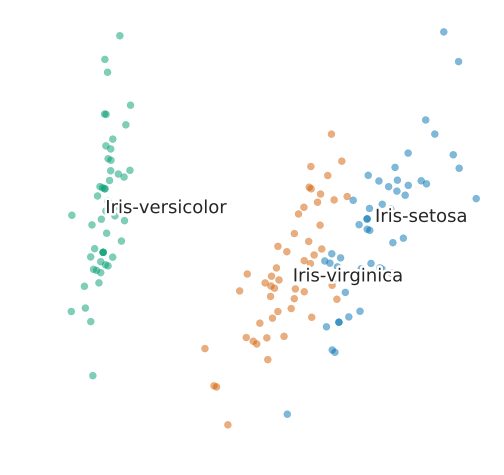

In [99]:
fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int))
plt.show()


In [102]:
from sklearn.manifold import TSNE

X_tsne = TSNE().fit_transform(X)

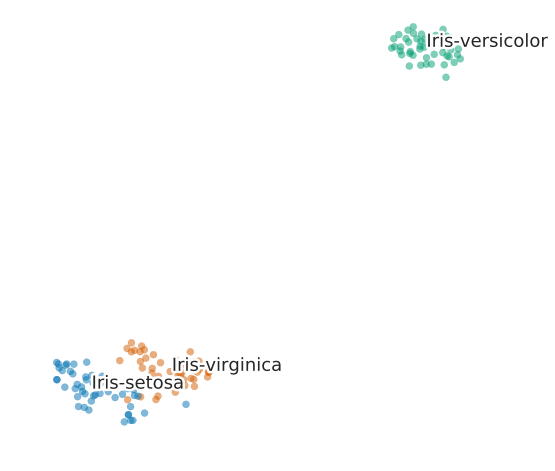

In [104]:
fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int))
plt.show()